# Python for Machine Learning

### *Session \#4*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Logistic Regression

### Warm Ups

*Type the given code into the cell below*

---

In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError, \
                                   ROCAUC, PrecisionRecallCurve
from yellowbrick.target import class_balance

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [2]:
df_ha = pd.read_csv('heart_attack.csv')

In [3]:
def assign_tts(df, model, tgt_txt, features='all', state=None):
    if features == 'all':
        X=df.drop(columns=[tgt_txt])
    elif isinstance(features, list):
        X=df[features]
    else:
        raise ValueError('Features should either be \'all\' or a list')
    y=df[tgt_txt]
    tts = train_test_split(X,y, random_state=state)
    model.X_train = tts[0]
    model.X_test = tts[1]
    model.y_train = tts[2]
    model.y_test = tts[3]
    return None
def std_fit(model):
    model.fit(model.X_train, model.y_train)
    return None
def std_predict(model):
    return model.predict(model.X_test)
def std_score(model):
    return model.score(model.X_test, model.y_test)

**Create and fit classifier**:

In [4]:
model11 = LogisticRegression()
assign_tts(df_ha, model11, 'heart_attack', features=['age'])
std_fit(model11)

**Use model to classify**:

In [5]:
print('number of predicted heart attacks: {0:0.0f}\n' \
      .format(std_predict(model11).sum()))
display(std_predict(model11))

number of predicted heart attacks: 0



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Use model to get probabilities**: `model.predict_proba(X_test)`

In [6]:
model11.predict_proba(model11.X_test)

array([[0.84304842, 0.15695158],
       [0.9210682 , 0.0789318 ],
       [0.79749999, 0.20250001],
       ...,
       [0.69585524, 0.30414476],
       [0.9210682 , 0.0789318 ],
       [0.91524008, 0.08475992]])

### Exercises
---

**1. Graph these probabilities with** `plt.plot()` 

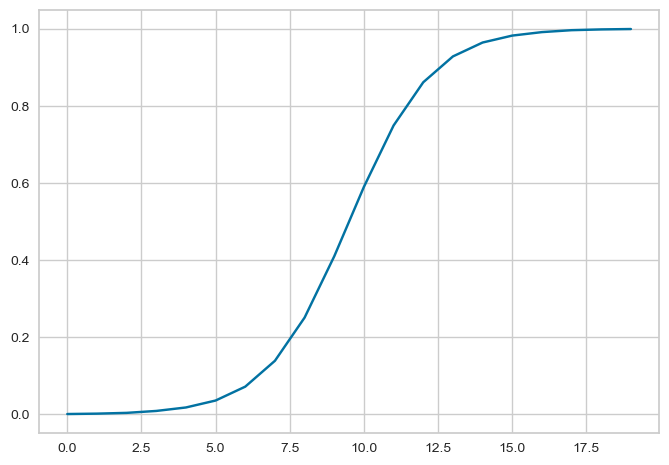

In [7]:
probabilities = np.array([0.001, 0.002, 0.004, 0.009, 
                         0.018, 0.036, 0.072, 0.139, 
                         0.251, 0.41 , 0.59 , 0.749, 
                         0.861, 0.928, 0.964, 0.982, 
                         0.991, 0.996, 0.998, 0.999])


plt.plot(probabilities)

**2. Now convert these probabilities into log-odds.**

**First divide** `probabilities` **by** `1 - probabilities` 

**Use** `np.log()` **afterwards, and** `.plot()` **the result.**

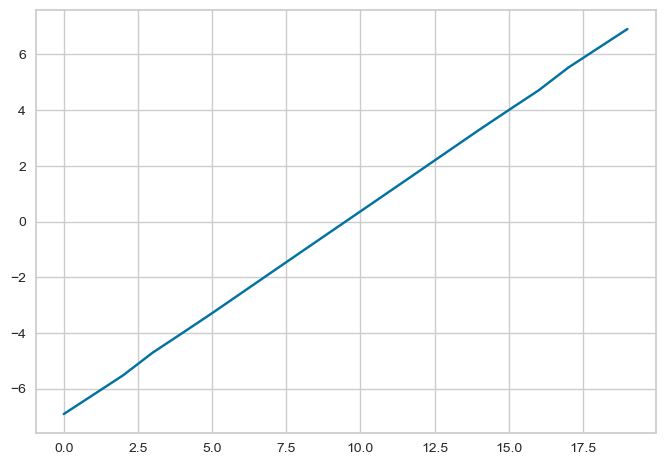

In [8]:
odds = probabilities / (1-probabilities)

log_odds = np.log(odds)

plt.plot(log_odds)

**3. Let's go from log-odds back to probabilities now!**

**Copy/paste the slope from** `model.coef_` **and the intercept from** `model.intercept_`

**Save them as** `slope` **and** `intercept`

In [9]:
slope11 = model11.coef_
intercept11 = model11.intercept_

**4. Plot the underlying linear model using plt.plot().**

**First feed in** `X_test` **as the x-axis and** `X_test*slope + intercept` **as the y-axis**

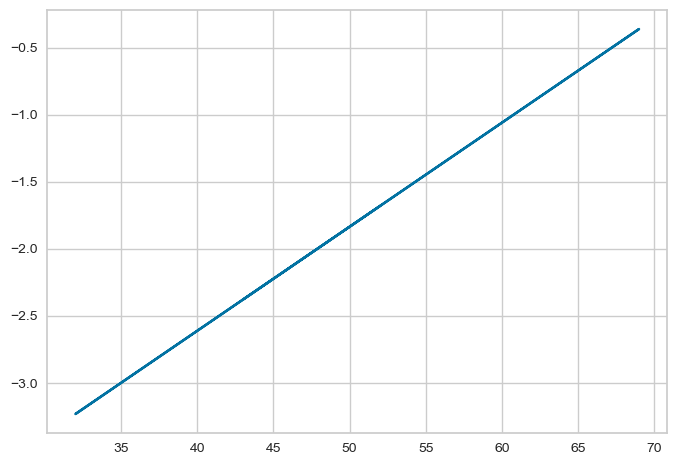

In [10]:
plt.plot(model11.X_test, model11.X_test*slope11 + intercept11)

**5. Use** `plt.scatter` **to plot** `X_test` **and** `y_test`, **and also to plot** `curve_x` and `curve_y` **which show the curve of the logistic classifier**

/Users/patrick/miniconda3/envs/python_for_data_science/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


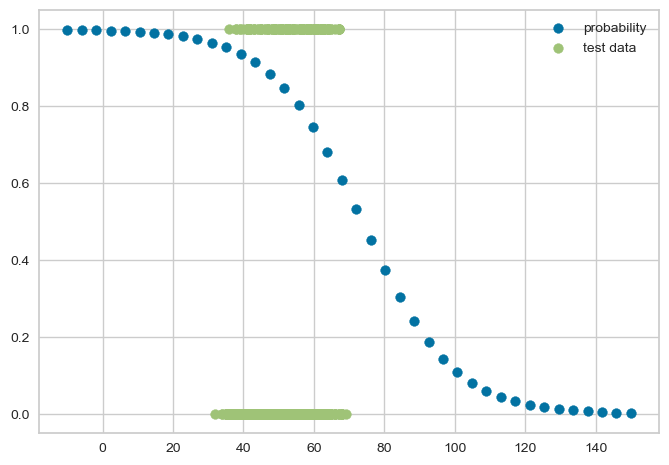

In [11]:
curve_x = np.linspace(-10, 150, 40).reshape(-1, 1)
curve_y = [a for a,b in model11.predict_proba(curve_x)]

plt.scatter(curve_x, curve_y, label='probability')
plt.scatter(model11.X_test, model11.y_test, label='test data')
plt.legend()
plt.show()

## II. ROC Curves and Class Imbalance

### Warm Ups

*Type the given code into the cell below*

---

**Create and fit classifier**: 
```python
model_roc = ROCAUC(model)
model_roc.fit(X_train, y_train)
model_roc.score(X_test, y_test)
model_roc.show()
```

/Users/patrick/miniconda3/envs/python_for_data_science/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


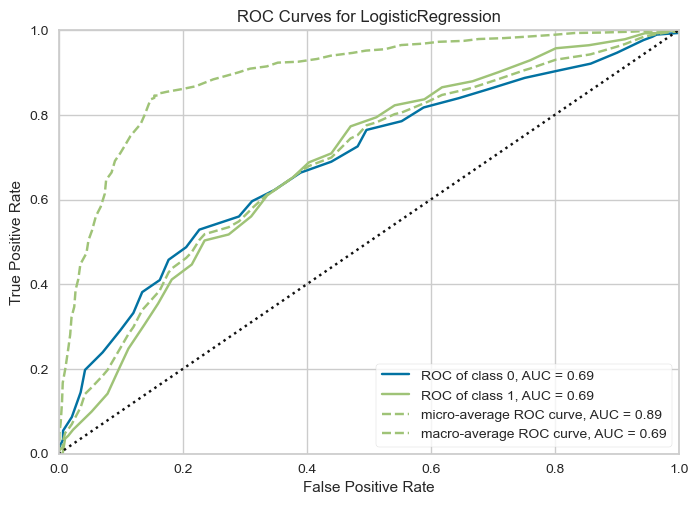

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [12]:
model_roc2i = ROCAUC(model11)
std_fit(model_roc2i)
std_score(model_roc2i)
model_roc2i.show()

#micro-avg: (tp0 + tp1) / (tp0 + tp1 + fp0 + fp1)
#macro-avg: tp0 x tp1

**Create ClassBalance visualization:** `class_balance(y)`

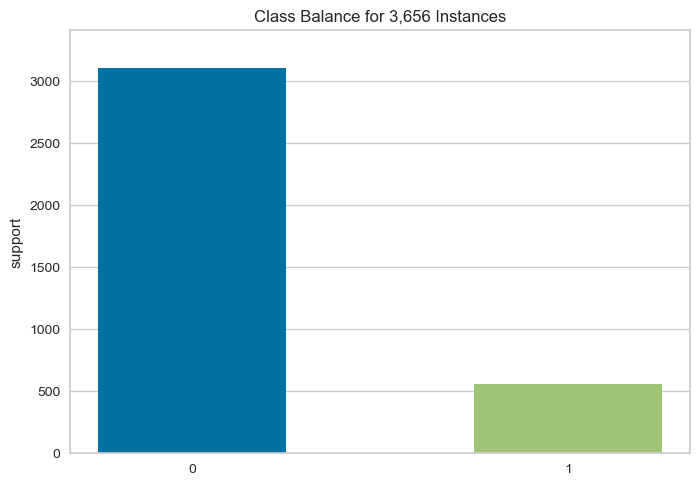

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 3,656 Instances'}, ylabel='support'>)

In [13]:
class_balance(df_ha['heart_attack'])

**Create and fit classifier**: 
```python
model_prc = PrecisionRecallCurve(model)
model_prc.fit(X_train, y_train)
model_prc.score(X_test, y_test)
model_prc.show()
```

/Users/patrick/miniconda3/envs/python_for_data_science/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


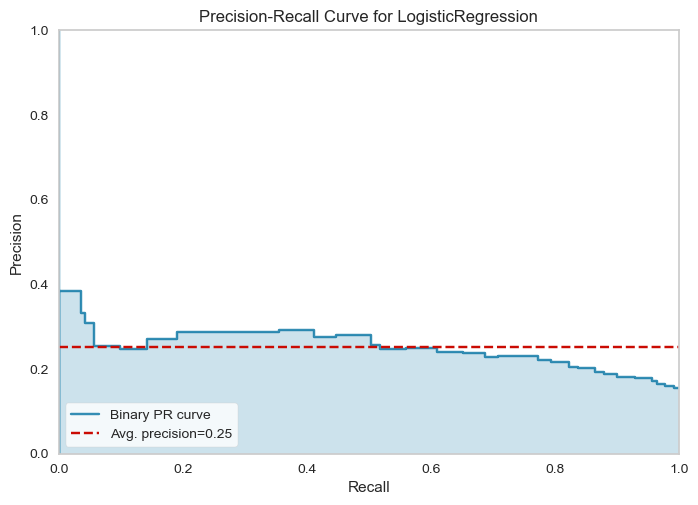

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [14]:
model_prc2i = PrecisionRecallCurve(model11)
std_fit(model_prc2i)
std_score(model_prc2i)
model_prc2i.show()

### Exercises
---

**1. Interpret the ROC curve below. What is the highest sensitivity we can reach while keeping false positives under 20% (ie. specificity > 0.8)?**

**If we care about both classes equally, what sensitivity and specificity should we choose?**

![image.png](../images/roc.png)

**2. If you were creating a machine learning model to catch credit card fraud, would you use an ROC curve or a precision-recall curve?**

In [15]:
# Precision-recall, because fraud data is HIGHLY imbalanced.

**3. Train and plot an ROC curve with a** `KNeighborsClassifier` **model and a** `LogisticRegression` **model. Which model performs better with this data, according to the AUC?** 

In [16]:
df_ha.head()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


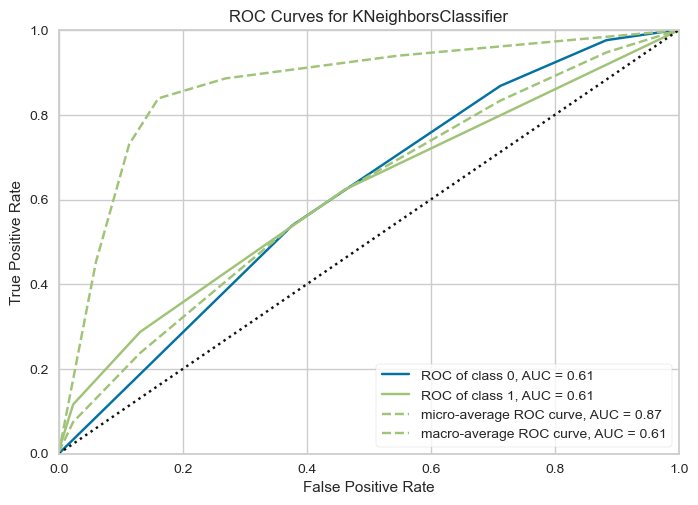

/Users/patrick/miniconda3/envs/python_for_data_science/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


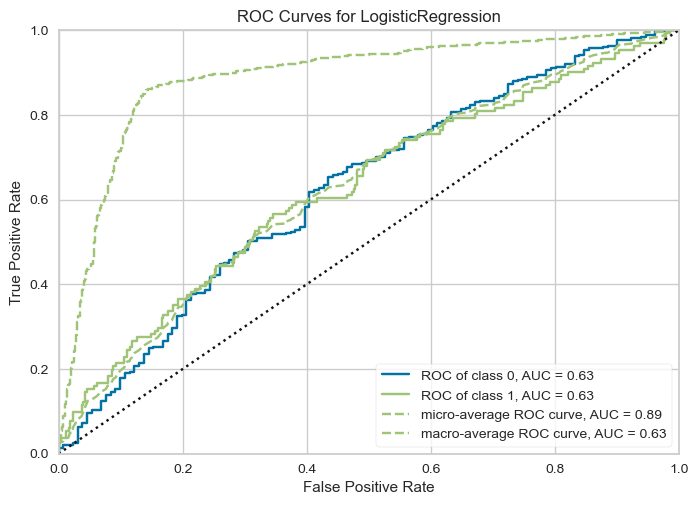

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [17]:
knn = ROCAUC(KNeighborsClassifier())
assign_tts(df_ha, knn, tgt_txt='heart_attack')
std_fit(knn)
std_score(knn)
knn.show()

log = ROCAUC(LogisticRegression())
assign_tts(df_ha, log, tgt_txt='heart_attack')
std_fit(log)
std_score(log)
log.show()

In [18]:
print('number of heart attacks predicted: {0:0.0f}\n' \
      .format(std_predict(log).sum()))
display(std_predict(log))

number of heart attacks predicted: 9



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**4. Let's examine more severe class imbalance.**

**Run the code below to drop most of the positive cases, then split the data into X and y again**

**Create a** `class_balance` **visualization to verify that the classes are now very imbalanced.**

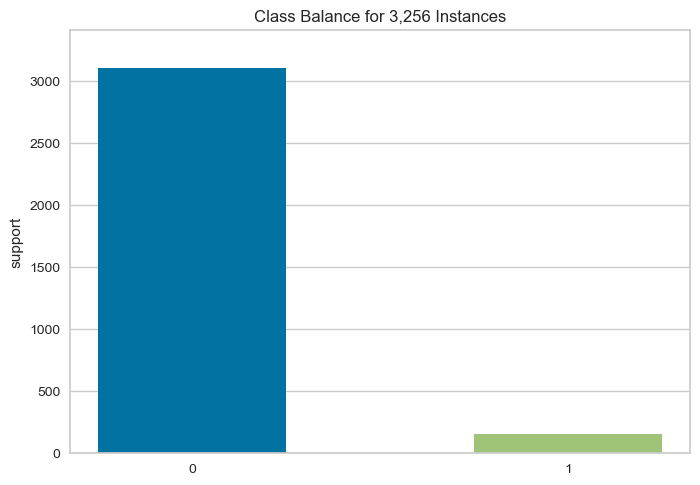

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 3,256 Instances'}, ylabel='support'>)

In [19]:
df_drop = pd.read_csv('heart_attack.csv')
df_drop.drop(df_drop.query('heart_attack == 1').sample(n=400).index, inplace=True)
class_balance(df_drop['heart_attack'])

**5. Paste and rerun your code from Question 3. Which model's performance has suffered more? Why**

**Replace the** `ROCAUC` **visualizers with** `PrecisionRecallCurve` **visualizers and rerun to get a minority-class focused view on performance.**

Hint: To help deal with limited data, you may need to pass `max_iter=10000` when creating your LogisticRegression model

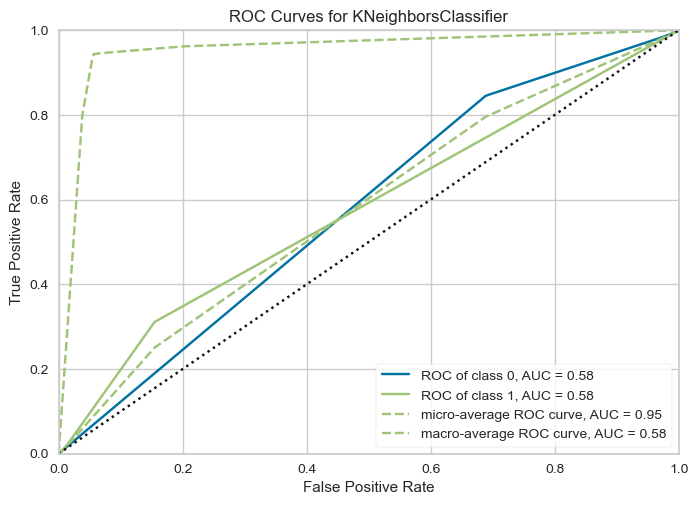

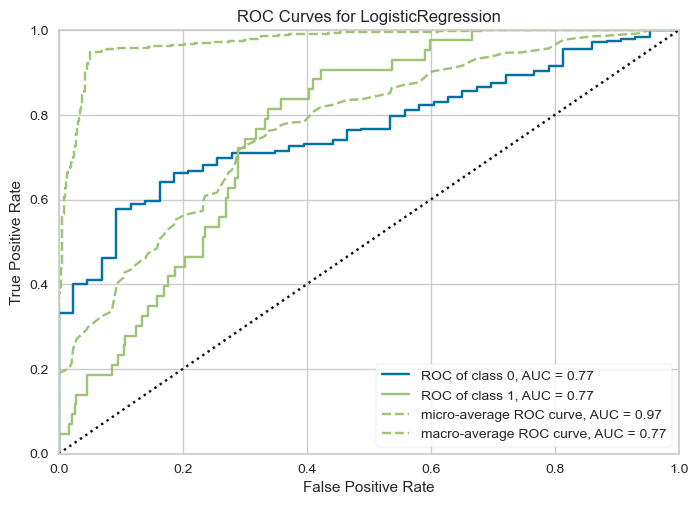

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [20]:
knn_drop_rocauc = ROCAUC(KNeighborsClassifier())
assign_tts(df_drop, knn_drop_rocauc, tgt_txt='heart_attack')
std_fit(knn_drop_rocauc)
std_score(knn_drop_rocauc)
knn_drop_rocauc.show()

log_drop_rocauc = ROCAUC(LogisticRegression(max_iter=10000))
assign_tts(df_drop, log_drop_rocauc, tgt_txt='heart_attack')
std_fit(log_drop_rocauc)
std_score(log_drop_rocauc)
log_drop_rocauc.show()

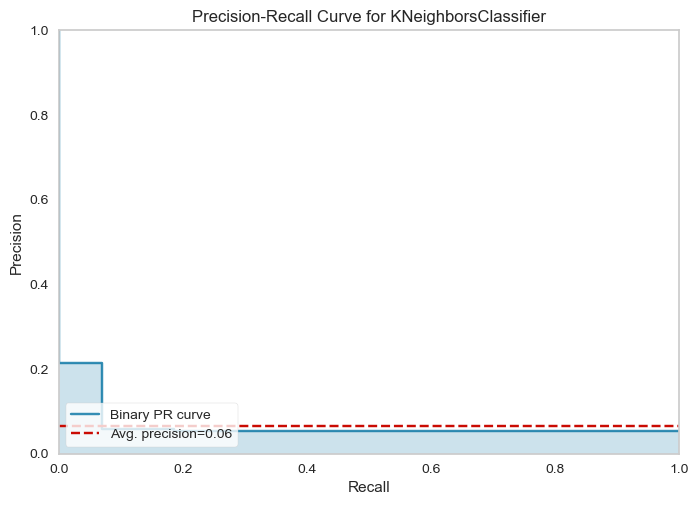

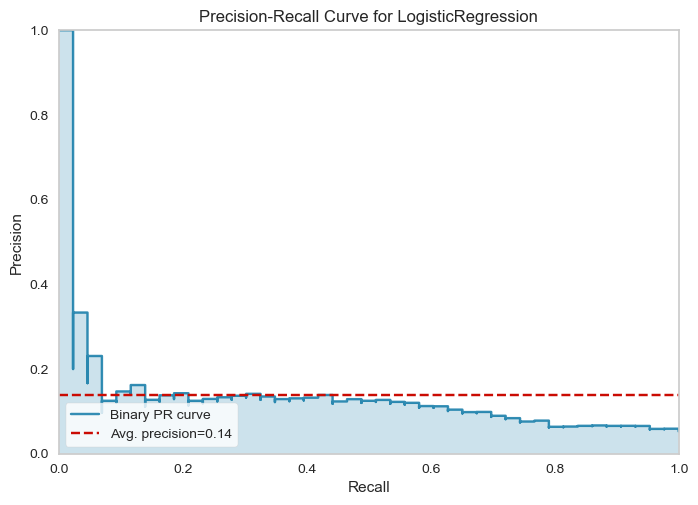

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [21]:
knn_drop_pr = PrecisionRecallCurve(KNeighborsClassifier())
assign_tts(df_drop, knn_drop_pr, tgt_txt='heart_attack', state=2)
std_fit(knn_drop_pr)
std_score(knn_drop_pr)
knn_drop_pr.show()

log_drop_pr = PrecisionRecallCurve(LogisticRegression(max_iter=10000))
assign_tts(df_drop, log_drop_pr, tgt_txt='heart_attack', state=2)
std_fit(log_drop_pr)
std_score(log_drop_pr)
log_drop_pr.show()

The bottom plot says if you want ~50% - 60% of your guesses to be right, you need to accept that you only capture 10% of all positive cases

## III. Stratified Sampling and Oversampling

### Warm Ups

*Type the given code into the cell below*

---

**Use stratified sampling:**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
```

In [22]:
tts3i = train_test_split(df_ha.drop(columns=['heart_attack']), 
                         df_ha['heart_attack'], 
                         stratify=df_ha['heart_attack'])

**Use RandomOverSampler to balance data:**
```python
sampler = RandomOverSampler()
sampler.fit_resample(X_train, y_train)
```

In [23]:
print(len(df_ha))

sampler = RandomOverSampler()
sampler.fit_resample(tts3i[0], tts3i[2])

3656


(      male  age  education  current_smoker  cigs_per_day  bp_meds  \
 0        1   65        2.0               0           0.0      0.0   
 1        0   39        2.0               1          20.0      0.0   
 2        0   46        3.0               1          20.0      1.0   
 3        0   47        2.0               0           0.0      0.0   
 4        0   46        1.0               0           0.0      0.0   
 ...    ...  ...        ...             ...           ...      ...   
 4643     0   60        1.0               1          15.0      0.0   
 4644     0   59        3.0               0           0.0      0.0   
 4645     0   59        1.0               0           0.0      1.0   
 4646     1   61        2.0               1          15.0      0.0   
 4647     1   54        1.0               1          20.0      0.0   
 
       prevalent_stroke  prevalent_hyp  diabetes  tot_chol  sys_bp  dia_bp  \
 0                    0              0         1     238.0   122.0    81.0   
 1

**Use RandomOverSampler in pipeline:**
```python
model = make_pipeline(RandomOverSampler(), LogisticRegression())
```

### Exercises
---

**1. Inside the for-loop, call** `train_test_split()` **WITHOUT the stratify parameter**

**Then within the for-loop call** `y_test.sum()` **to count the number of positive cases.**

**Rerun with the stratify parameter set to** `y`

In [24]:
for i in range(10):
    
    # Add your code here
    tts31 = train_test_split(df_ha.drop(columns=['heart_attack']), 
                             df_ha['heart_attack'], 
                             stratify=None)
    print('False cases: '+str(tts31[3].count() - tts31[3].sum()))
    print('Positive cases: '+str(tts31[3].sum()))
    print('')

False cases: 776
Positive cases: 138

False cases: 782
Positive cases: 132

False cases: 785
Positive cases: 129

False cases: 774
Positive cases: 140

False cases: 778
Positive cases: 136

False cases: 781
Positive cases: 133

False cases: 768
Positive cases: 146

False cases: 781
Positive cases: 133

False cases: 779
Positive cases: 135

False cases: 769
Positive cases: 145



Notice the variance in number of positive cases above.

In [25]:
for i in range(10):
    
    # Add your code here
    tts31_strat = train_test_split(df_ha.drop(columns=['heart_attack']), 
                                   df_ha['heart_attack'], 
                                   stratify=df_ha['heart_attack'])
    print('False cases: '+str(tts31_strat[3].count() - tts31_strat[3].sum()))
    print('Positive cases: '+str(tts31_strat[3].sum()))
    print('')

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139



Notice the consistence in number of positive cases above.

**2. Create a** `RandomOverSampler()` **and use .fit_resample() on X_train and y_train**

**This will return two arrays -- the rebalanced versions of** `X_train` **and** `y_train` 

**Take the mean of the new** `y_train` **to show that it's balanced**

In [26]:
print(tts31_strat[2].mean()) #previous portion of positive cases
ros = RandomOverSampler()
new_X_train, new_y_train = ros.fit_resample(tts31_strat[0], tts31_strat[2])
print(new_y_train.mean()) #new portion of positive cases

0.15244347191830782
0.5


**3. Fit a** `LogisticRegression()` **model to the training data, and use it to plot a ConfusionMatrix**

**What is the accuracy and sensitivity of the model?**

Accuracy: 0.8566739606126915
Negative sensitivity: 0.08208955223880597


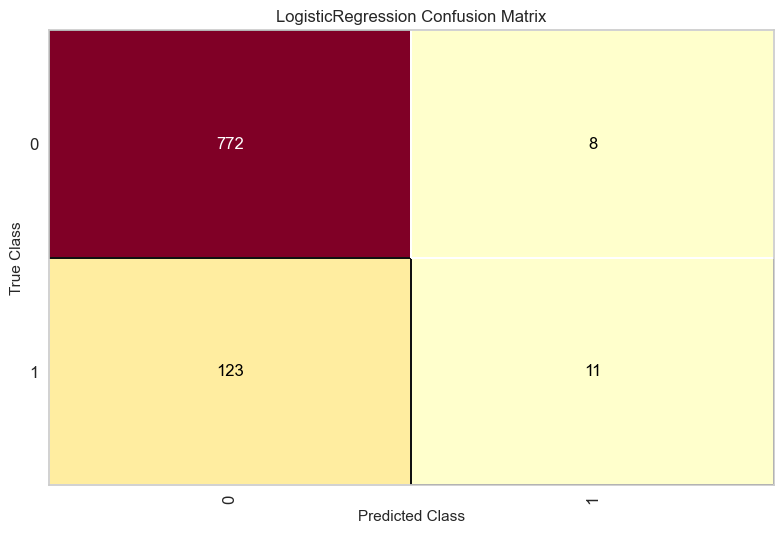

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [27]:
log33 = ConfusionMatrix(LogisticRegression(max_iter=10000))
assign_tts(df_ha, log33, tgt_txt='heart_attack', state=1)
std_fit(log33)
# Accuracy is percentage of samples correctly identified.
print('Accuracy: '+str(std_score(log33)))
# Sensitivity is the proportion of true positives that you correctly identified
# as such.
tp33 = log33.confusion_matrix_[1,1] #True positives
fp33 = log33.confusion_matrix_[1,0] #False positives
print('Negative sensitivity: '+str(tp33 / (tp33 + fp33)))
log33.show()

**4. Create a pipeline with a** `RandomOverSampler` **and** `LogisticRegression()` **and fit it to the training data**

**What is the accuracy and sensitivity of the new model?**

Accuracy: 0.6695842450765864
Negative sensitivity: 0.664179104477612


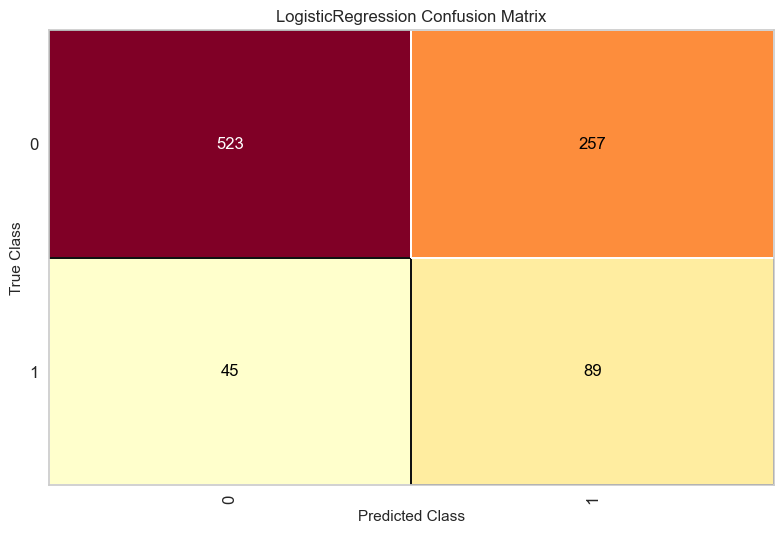

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
pipe34 = make_pipeline(RandomOverSampler(), 
                       LogisticRegression(max_iter=10000))

cm34 = ConfusionMatrix(pipe34)
assign_tts(df_ha, cm34, tgt_txt='heart_attack', state=1)
std_fit(cm34)
print('Accuracy: '+str(std_score(cm34)))
tp34 = cm34.confusion_matrix_[1,1] #True positives
fp34 = cm34.confusion_matrix_[1,0] #False positives
print('Negative sensitivity: '+str(tp34 / (tp34 + fp34)))
cm34.show()